In [35]:
import pandas as pd
import re
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns

path=r'../datas/Option_A/Brazil_Supply and demand series.xlsx'

#path=r'../datas/Option_A/Arg_Brz_Mxc_Supply and demand series.xlsx'

data=pd.read_excel(path)


# Find the index of rows that match a specific expression using regular expressions
regex_pattern = r'^Brazil.*'  # Example regex pattern to match Argentina
indexes = data[data['Unnamed: 0'].str.contains(regex_pattern, regex=True, na=False)].index
indexes=list(indexes)
indexes.append(indexes[-1]+56)
print(indexes)

# Find the List of Items
regex_pattern = r'^Brazil - (.*)'  # Example regex pattern to match Argentina
# Extract the desired part using regular expressions
extracted_list = data.loc[data['Unnamed: 0'].str.contains(regex_pattern, regex=True, na=False), 'Unnamed: 0'].str.extract(regex_pattern, expand=False).to_list()
#print(extracted_list)

Dict=dict()

for i in range(len(extracted_list)):
    Dict[extracted_list[i]]=data[indexes[i]:indexes[i+1]]
    Dict[extracted_list[i]].index.name=None
    Dict[extracted_list[i]]=Dict[extracted_list[i]][1:]
    new_header = Dict[extracted_list[i]].iloc[0] #grab the first row for the header
    #new_header = pd.concat([Dict[extracted_list[i]].iloc[0], Dict[extracted_list[i]].iloc[1]], axis=1).T
    Dict[extracted_list[i]] = Dict[extracted_list[i]][1:] #take the data less the header row
    Dict[extracted_list[i]].columns = new_header #set the header row as the df header 
    Dict[extracted_list[i]] = Dict[extracted_list[i]].reset_index(drop=True)
    Dict[extracted_list[i]]=Dict[extracted_list[i]].iloc[1:]
    Dict[extracted_list[i]]=Dict[extracted_list[i]].iloc[:-1]
    Dict[extracted_list[i]]=Dict[extracted_list[i]].rename(columns={np.nan: 'Year'})
     
    # Round the values of each column to 2 decimal places
    Dict[extracted_list[i]] = Dict[extracted_list[i]].applymap(lambda x: round(x, 2) if pd.notnull(x) and isinstance(x, (int, float)) else x)
    

[2, 58, 114, 170, 226, 282, 338, 394, 450, 506, 562, 618, 674, 730, 786, 842, 898, 954, 1010, 1066, 1122, 1178, 1234, 1290, 1346, 1402, 1458, 1514]


/var/folders/cr/7sx_pjr5131byrt21svnsg0w0000gn/T/ipykernel_27446/3691856120.py:25: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  extracted_list = data.loc[data['Unnamed: 0'].str.contains(regex_pattern, regex=True, na=False), 'Unnamed: 0'].str.extract(regex_pattern, expand=False).to_list()


In [31]:
activity= extracted_list[0]
print(activity)
df_Prod= Dict[activity]
df_Prod.head()

Production


3,Year,Oil,Natural gas,Coal,Hydroenergy,Nuclear,Firewood,Sugarcane and products,Other Primary_x000d_\n,Total Primaries,...,Kerosene/jet fuel,Diesel oil,Fuel oil,Coke,Charcoal,Gases,Other secondary,Non-energy,Total Secundaries,Total
1,1970,8161.58,1102.24,1044.43,3421.52,NaN,31851.53,3600.70,223.24,49405.24,...,1307.21,5674.61,8399.23,55.18,1766.75,465.95,321.73,886.77,31068.07,49405.24
2,1971,8521.00,952.80,1108.82,3713.63,NaN,31807.22,3841.81,232.82,50178.10,...,1338.29,6065.55,9216.61,49.66,2012.13,466.01,579.44,840.39,33809.63,50178.10
3,1972,8313.08,909.97,1115.99,4356.82,NaN,32143.13,4298.39,301.43,51438.80,...,1391.47,7628.45,10859.63,31.73,2331.77,472.67,512.33,971.51,39563.56,51438.80
4,1973,8453.46,811.23,1055.34,4976.55,NaN,31897.40,4644.41,310.58,52148.96,...,1673.21,8748.11,12913.19,NaN,2474.48,513.83,964.63,971.51,46480.08,52148.96
5,1974,8969.47,954.48,1457.99,5646.13,NaN,32598.64,4618.65,348.89,54594.25,...,1771.39,9661.16,13382.63,NaN,3086.00,526.41,1132.90,1367.85,50398.68,54594.25


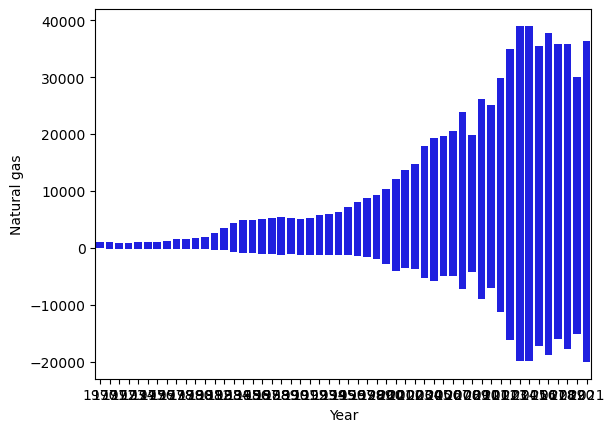

In [38]:
# Set index name to None for each DataFrame in the dictionary Dict
for activity,df in Dict.items():
    #df.index.name = None
    #df.set_index('Year', inplace=True)
    # Calculate the number of NaN values in each column
    nan_counts = df.isnull().sum()
    # Replace NaN values in each column with the desired value (e.g., 0)
    for column, count in nan_counts.items():
        if count > 0:
            df[column].fillna(0, inplace=True)
    sns.barplot(x="Year", y="Natural gas", data=df,
            label="Total", color="b")

    
    

In [27]:
sns.barplot(x="Year", y="Oil", data=df,
            label="Total", color="b")

sns.lineplot(x="Year", y="Oil",data=df, palette="bright", linewidth=2.5)

ValueError: Could not interpret input 'Year'

In [ ]:
# Calculate the number of NaN values in each column
nan_counts = df.isnull().sum()
# Replace NaN values in each column with the desired value (e.g., 0)
for column, count in nan_counts.items():
    if count > 0:
        df[column].fillna(0, inplace=True)
        
df.isnull().sum()

In [ ]:
# Plot all columns against the 'Year' index
df.plot(figsize=(10, 6))
plt.xlabel('Year')
plt.ylabel("ktoe")
plt.title('Evolution of energies Over Time')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

In [ ]:
df.Oil.plot()

In [12]:
Dict["Total supply"]

t_supply





3,Oil,Natural gas,Coal,Hydroenergy,Nuclear,Firewood,Sugarcane and products,Other Primary_x000d_\n,Total Primaries,Electricity,...,Kerosene/jet fuel,Diesel oil,Fuel oil,Coke,Charcoal,Gases,Other secondary,Non-energy,Total Secundaries,Total
Year,,,,,,,,,,,,,,,,,,,,,
1970,25941.58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68543.72,NaN,...,1192.49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31085.43,68561.08
1971,28189.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71002.23,NaN,...,1309.60,6122.13,9314.18,NaN,NaN,NaN,NaN,1277.81,34964.93,72157.53
1972,32968.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77377.68,NaN,...,1351.30,NaN,9796.49,NaN,NaN,NaN,NaN,1441.43,39249.79,77063.91
1973,42599.41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87525.49,5562.83,...,1622.39,8466.05,11323.55,NaN,NaN,NaN,NaN,1441.43,45447.18,86492.59
1974,43372.32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90203.48,6167.08,...,NaN,8835.56,11839.01,NaN,NaN,NaN,NaN,NaN,49213.05,89017.85
1975,44154.39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92210.16,6790.51,...,NaN,10162.69,13412.08,NaN,NaN,NaN,NaN,1858.71,54141.28,91042.25
1976,47326.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96121.66,7743.86,...,NaN,11931.35,15233.03,NaN,NaN,NaN,NaN,NaN,59601.48,96789.93
1977,48275.82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99740.90,8672.98,...,NaN,12867.54,15453.89,NaN,NaN,NaN,NaN,NaN,61372.26,99627.23
1978,53718.76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,106117.54,9679.90,...,2149.71,14172.38,16751.73,NaN,NaN,NaN,NaN,NaN,67703.68,105182.91


In [ ]:
df.Oil

In [ ]:

plt.hist(df.Oil,bins=60)